dedispersing CHIME1 by -0.12059999999996762 pc/cm^3
finding fit CHIME1...


B:\dev\galacticfrb\driftrate.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  temp_array_a[0:nx,:] = result_shifted[nx-1:2*nx-1,:]
B:\dev\galacticfrb\driftrate.py:137: ComplexWarning: Casting complex values to real discards the imaginary part
  temp_array_a[nx:2*nx-1,:] = result_shifted[0:nx-1,:]


solution nlsq: [  40.96146175   40.47175037 1018.66612711  177.50311466    2.26014714
    1.57531477]


B:\dev\galacticfrb\driftrate.py:210: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("gray"))
  cmap.set_bad(color = 'w', alpha = 1.)


dedispersing CHIME2 by -0.12059999999996762 pc/cm^3
finding fit CHIME2...
solution nlsq: [ 33.4061686   68.4451369  991.85536125 360.24810121   1.57819333
   1.57368518]
dedispersing B1 by -0.12059999999996762 pc/cm^3
finding fit B1...
solution nlsq: [434.71204128 188.49842349 256.51057853 111.76507029  12.4213987
   1.57363633]
dedispersing B2 by -0.12059999999996762 pc/cm^3
finding fit B2...
solution nlsq: [ 30.54519531 188.48111366 256.3946607  110.54998256   7.81293745
  -1.56587384]
dedispersing S1 by -0.10199999999997544 pc/cm^3
finding fit S1...
solution nlsq: [ 3.94488187e+04  2.00421823e+02  2.55522492e+02  3.38663471e+00
 -1.10560174e+02  3.16571879e+00]


,amplitude,xo,yo,sigmax,sigmay,theta,amp_error,xo_error,yo_error,sigmax_error,sigmay_error,angle_error,drift (mhz/ms),drift error (mhz/ms),angle,center_f,red_chisq,time_res,freq_res
CHIME1,40.9615,40.4718,1018.67,177.503,2.26015,1.57531,0.198438,0.0116179,0.859855,0.859864,0.010949,8.72511e-05,-87.9422,1.69819,1.57531,467.283,0.150339,0.00098304,0.390625
CHIME2,33.4062,68.4451,991.855,360.248,1.57819,1.57369,0.0281356,0.00159124,0.303325,0.304564,0.00132821,5.21706e-06,-137.551,0.248408,1.57369,672.341,5.51989,0.00098304,0.390625
B1,434.712,188.498,256.511,111.765,12.4214,1.57364,0.0338754,0.000961483,0.00870917,0.0090149,0.000961169,1.24007e-05,-5501.73,24.0231,1.57364,1325.8,63.2991,3.2e-05,0.5
B2,30.5452,188.481,256.395,110.55,7.81294,-1.56587,0.0410605,0.0104606,0.148584,0.15337,0.0104351,0.000135008,-3174.18,87.0586,-1.56587,1317.17,8.88716,3.2e-05,0.5
S1,39448.8,200.422,255.522,3.38663,-110.56,3.16572,136.715,0.0148793,0.383063,0.0116624,0.395497,0.000150239,-463.137,2.88519,1.59492,1362.55,8.79177,6.5536e-05,0.732422


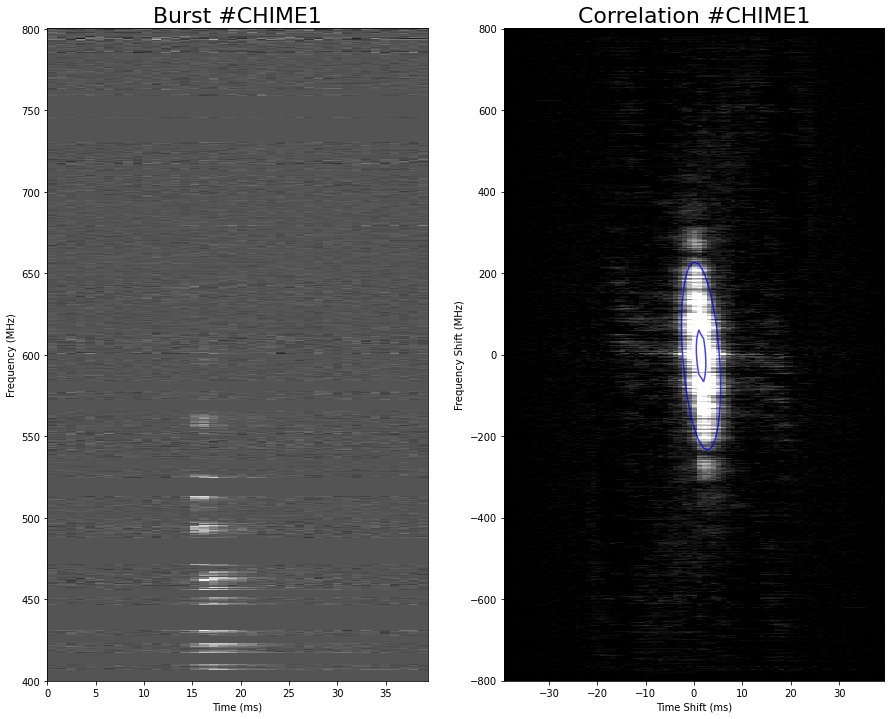

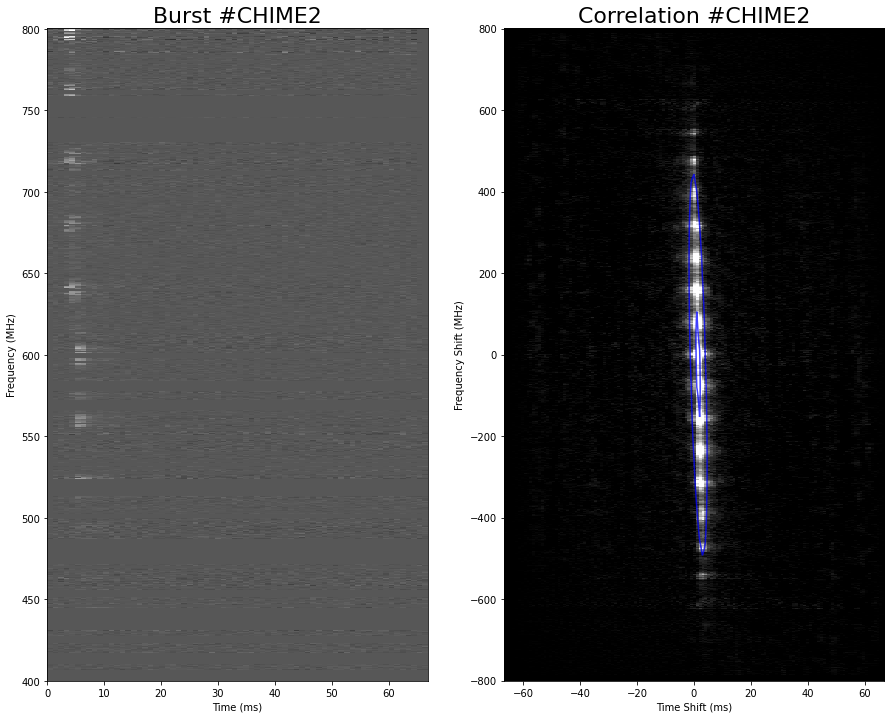

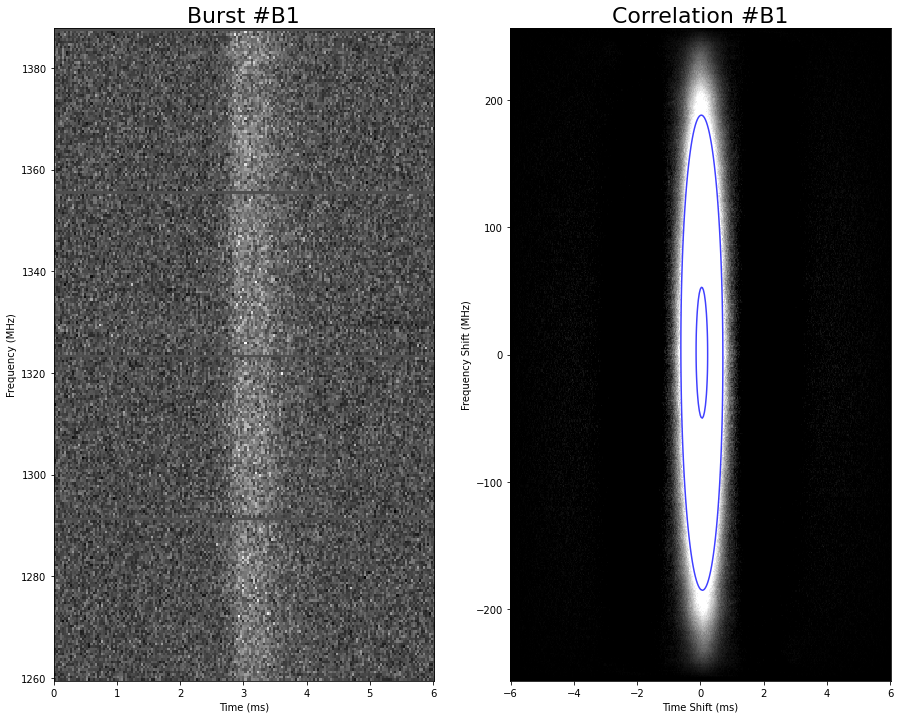

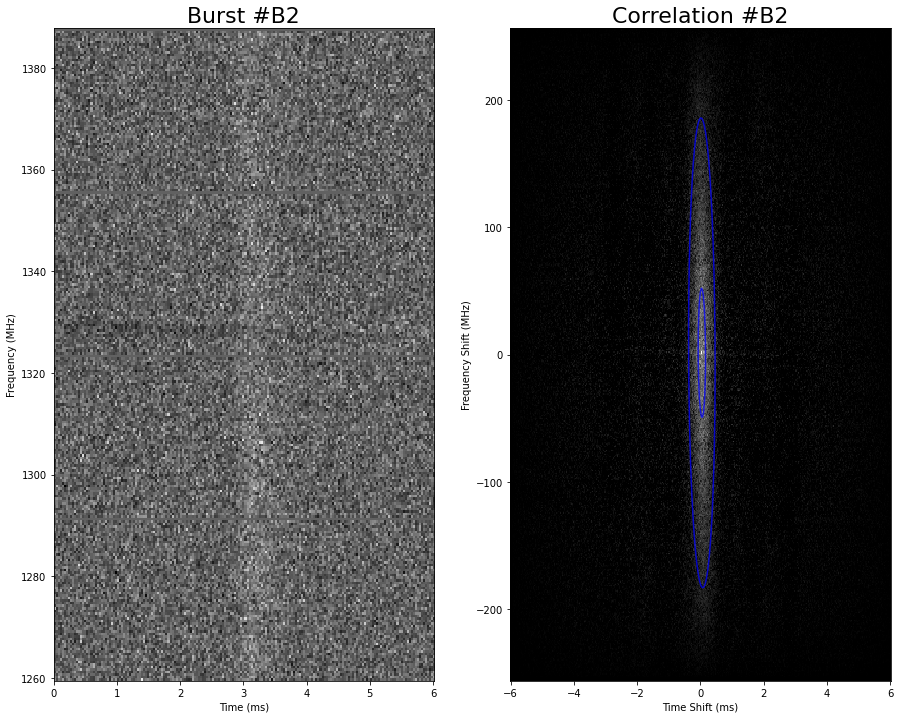

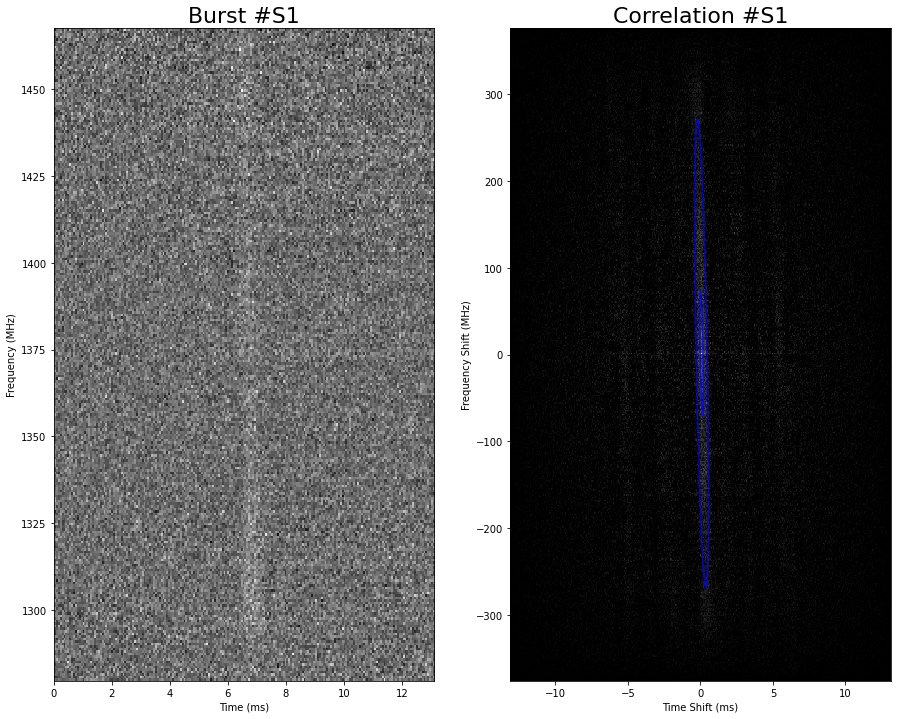

In [8]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import driftrate

cmap = 'gray'
def getCHIMEBurst(plot=False):
    maxsnr_beam = 2067
    #data = np.load("data/chime/aro_detection.npz")
    data = np.load("data/chime/chimefrb_SGR1935+2154_20200428_B{}.npz".format(maxsnr_beam))
    #print(data.files)
    intensity = data["intensity"]
    intensity = np.nan_to_num(intensity)
    
    #corr = driftrate.auto_corr2D_viafft(intensity[:,50:90])
    if plot:
        plt.figure(figsize=(15,9))
        plt.imshow(intensity[:, 40:], aspect="auto", origin="lower", cmap=cmap)
        plt.clim(-0.15, 0.1)
        print(np.min(intensity), np.max(intensity))
    
    # CHIME
    burst1 = intensity[:, 50:90]
    burst2 = intensity[:, 90:]
    
    # ARO
    #burst1 = intensity[:, 40:70]
    #burst2 = intensity[:, 71:90]
    
    return [burst1, burst2]

def getKirstenBursts(plot=False):
    kirstenb1 = np.load('data/franz/kirsten_et_al_NatAst_2020/burst_plot/B1_downsampled.npy')
    kirstenb2 = np.load('data/franz/kirsten_et_al_NatAst_2020/burst_plot/B2_downsampled.npy')

    # noise
    for chan in [191, 127, 63]:
        kirstenb1[chan:chan+1] = 0
        kirstenb2[chan:chan+1] = 0

    if plot:
        for burst in [kirstenb1, kirstenb2]:
            plt.figure(figsize=(8,15))
            plt.imshow(burst, aspect="auto", origin="lower", cmap=cmap)
            plt.clim(-1,1)

    return [kirstenb1, kirstenb2]

stare2_subband = 6
def getSTARE2Burst(plot=False):
    stareburst = np.load('data/stare2/ovro_dedisp_dm332.702.npy')
    stareburst[0:500,...] = 0
    stareburst[2036:,...] = 0
    stareburst = stareburst[500:2036]
    
    stareburst = stareburst[:,400:600]
    stareburst = stareburst - stareburst[:, 0:75].mean(axis=1)[:, None]
    stareburst = driftrate.subband(stareburst, 1536//stare2_subband)
    stareburst = np.flipud(stareburst)

    return [stareburst]

AROParameters = {
    'dt_s'            : 0.00098304,
    'df_mhz'          : 400/256,
    'nchan'           : 1024,
    'freq_bottom_mhz' : 400.1953125,
    'freq_top_mhz'    : 800.1953125,
    'dm'              : 332.7206
}

CHIMEParameters = {
    'dt_s'            : 0.00098304,
    'df_mhz'          : 400/1024,
    'nchan'           : 1024,
    'freq_bottom_mhz' : 400.1953125,
    'freq_top_mhz'    : 800.1953125,
    'dm'              : 332.7206
}

KirstenParameters = {
    'dt_s'            : 32*10**-6,
    'df_mhz'          : 0.5,
    'nchan'           : 256,
    'freq_bottom_mhz' : 1259.74, 
    'freq_top_mhz'    : 1387.74,
    'dm'              : 332.7206
}

STARE2Parameters = {
    'dt_s'            : 0.000065536,
    'df_mhz'          : (1530-1280)/2048*stare2_subband, # ~0.12MHz
    'nchan'           : 2048,
    'freq_bottom_mhz' : 1280, 
    'freq_top_mhz'    : 1530,
    'dm'              : 332.702
}

bursts = getCHIMEBurst() + getKirstenBursts() + getSTARE2Burst()

# CHIME1 Masking
bursts[0][221:224] = 0
bursts[0][257:259] = 0
bursts[0][312:318] = 0
bursts[0][144:146] = 0
bursts[0][114:116] = 0

# CHIME2 Masking
bursts[1][144:146] = 0
bursts[1][220:222] = 0
bursts[1][256:260] = 0
bursts[1][309:313] = 0
bursts[1][476:480] = 0
bursts[1][511:514] = 0
bursts[1][969:971] = 0
bursts[1][1006:1008] = 0

outputdata = pd.DataFrame(index=['CHIME1', 'CHIME2', 'B1', 'B2', 'S1'], 
                          columns=['amplitude', 'xo', 'yo', 'sigmax', 'sigmay', 'theta', 'amp_error', 'xo_error', 'yo_error', 'sigmax_error', 'sigmay_error', 'angle_error',
                                  'drift (mhz/ms)', 'drift error (mhz/ms)', 'angle', 'center_f', 'red_chisq', 'time_res', 'freq_res'])
for burst, bid, p0 in zip(bursts, 
                          ['CHIME1', 'CHIME2', 'B1', 'B2', 'S1'], 
                          [[1000, 40, 1024, 50, 10, 1.567], [41, 68, 1023, 176, 2, 1.57], [], [], []]):

    if bid[0] == 'C':
        params = CHIMEParameters
    elif bid[0] == 'A':
        params = AROParameters
    elif bid[0] == 'B':
        params = KirstenParameters
    elif bid[0] == 'S':
        params = STARE2Parameters

    ddm = 332.7206 - params['dm'] # dedisperse to the CHIME DM
    ddm = 332.702 - params['dm'] # dedisperse to the STARE2 DM
    ddm = 332.658 - params['dm'] # dedisperse to the October 2020 DM
    ddm = 332.6 - params['dm']   # dedisperse to less than the October 2020 DM
    #ddm = 332.4 - params['dm']   # force fit upper bound (between 332.4-332.5)
    #ddm = 331.0 - params['dm']   # force fit lower bound
    #ddm = 332.2 - params['dm']   # best fit-ish by eye (several DMs in this range are visually similar)
    #ddm = 331.5 - params['dm']   # 
    print('dedispersing {} by {} pc/cm^3'.format(bid, ddm))
    burst = driftrate.dedisperse(burst, ddm, params['freq_bottom_mhz'], params['df_mhz'], params['dt_s']*1000)
    
    drift, drift_error, popt, perr, theta, red_chisq, center_f = driftrate.processBurst(burst, bid, params['df_mhz'], params['dt_s']*1000, params['freq_bottom_mhz'], p0=p0)
    outputdata.loc[bid] = [*popt, *perr, drift, drift_error, theta, center_f, red_chisq, params['dt_s'], params['df_mhz']]
    plt.savefig('figures/{}corr.png'.format(bid))

outfile = 'data/aggregate/SGR1935+2154bursts.csv'
outputdata.to_csv(outfile, index_label="name")

# leave a copy in the sadtrombone project
from shutil import copyfile
copyfile(outfile, '../sadtrombone/universal/data/SGR1935+2154/{}'.format('SGR1935+2154bursts.csv'))
outputdata